# Image Clustering - Timotej Zatko

Dokument obsahuje 3. Odovzdanie, 4. Odovzdanie a 5. Odovzdanie. Prve a druhe boli vo frome slajdov.

## 3. Odovzdanie

In [1]:
from PIL import Image
from os import listdir
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pickle

from functools import cmp_to_key

import seaborn as sb

from sklearn.cluster import KMeans

In [2]:
from scipy.cluster.vq import *

Importneme to co potrebujeme...

Nacitame si obrazky.

In [3]:
def fn(x, y):
    fileName1 = x.split('.')[0]
    fileName2 = y.split('.')[0]
    return int(fileName1) - int(fileName2)
    

images = list(filter(lambda a: a.find('.png') != -1, listdir('font-images/data')))
images = sorted(images, key=cmp_to_key(fn))

images = list(map(lambda a: 'font-images/data/' + a, images))

Takto vyzeraju moje data... (sam som si ich nascrapoval :))

In [4]:
def alphabet(k):
    fig = plt.figure(figsize=(13, 2))
    s = k * 26

    for i in range(0, 26):
        img = np.array(Image.open(images[s + i], 'r'))
        fig.add_subplot(2, 13, i + 1)
        plt.imshow(img)

    plt.show()

In [5]:
print("Mame celkovo " + str(int(len(images) / 26)) + " typov fontov.");

Mame celkovo 16 typov fontov.


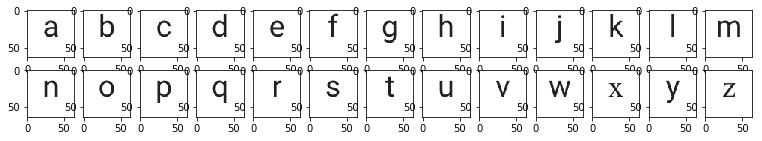

In [6]:
alphabet(0)

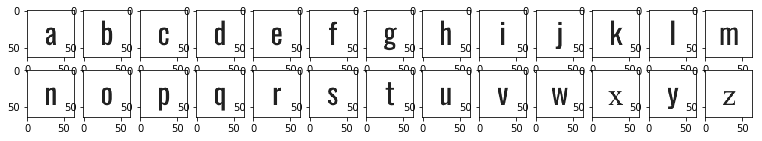

In [7]:
alphabet(8)

Spracujeme obrazky...

In [8]:
immatrix = np.array([np.array(Image.open(im)).flatten() for im in images], 'f')

Zoberieme KMeans.

In [9]:
cls = KMeans(n_clusters=26, random_state=420)

Polozime fit funkciu.

In [10]:
kmeans = cls.fit(immatrix)

Idem pozriet clustre, napr. ten prvy.

In [11]:
clusters = kmeans.labels_
clusters

array([ 8,  8,  8,  8,  8,  5,  8,  8,  5, 20,  3,  5, 15,  8,  8,  8,  8,
        6,  8,  5,  8, 14,  7,  3,  1,  3,  0,  0, 22, 17, 22, 20, 22,  0,
       20, 20, 10, 20, 12,  0, 17,  0, 17, 14, 22, 20,  0, 13, 18, 24, 13,
       24,  0,  0, 22, 17, 22, 20, 22,  0, 20, 20, 10, 20, 12,  0, 17,  0,
       17, 14, 22, 20,  0, 13, 18, 24, 13, 24, 23, 19, 23, 19, 23, 20, 23,
       19, 20, 20, 14, 20, 12, 19, 19, 19, 19, 14, 23,  6, 19, 13, 18, 14,
       13, 24,  2,  2,  2,  2,  2,  6, 25,  2,  5, 20,  3,  5, 15,  2,  2,
        2,  2,  6,  3,  6,  2,  1,  7, 14,  1, 14,  9, 11,  9,  9,  9,  5,
        9, 11,  5, 20,  3,  5, 15, 11,  9, 11,  9,  6,  3,  6,  9,  1,  7,
       14,  1, 14,  4,  4,  8,  4,  4, 16,  4,  4, 16, 16,  4, 16, 21,  4,
        4,  4,  4,  6,  4, 16,  4,  4, 21,  3,  4,  3, 25, 25, 25,  8, 25,
        5,  8, 25,  5, 20,  3,  5, 15, 25,  8, 25,  8,  6, 25,  5, 25, 14,
        7,  3, 14,  3, 10, 10, 10, 10, 10, 20, 10, 10, 20, 20, 10, 20, 20,
       10, 10, 10, 10, 14

In [12]:
def print_cluster(num):
    cluster = list(filter(lambda cluster_num: cluster_num[1] == num, enumerate(clusters)))
    size = len(cluster)
    
    fig = plt.figure(figsize=(20, 10))
    i = 0

    for image in cluster:
        i = i + 1
        img = np.array(Image.open(images[image[0]], 'r'))
        fig.add_subplot(10, 20, i)
        plt.imshow(img)

Pozrieme sa na prvy cluster.

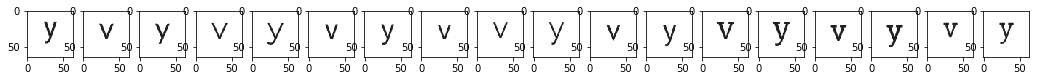

In [13]:
print_cluster(1)

Looool, vyzera to celkom dobre, vacisnu tam je _j_ , je tam aj _i_ co este chapem. Ale co tam robi _f, m a t (wtf?)_.

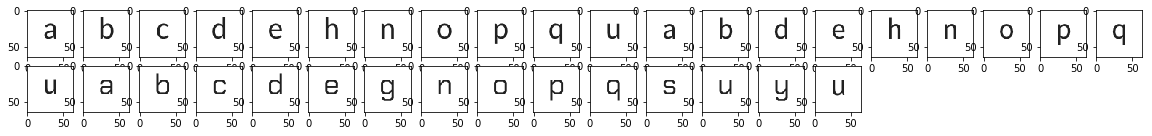

In [14]:
print_cluster(2)

Druhy cluster nespravilo uplne najlepsie, ale celkom moze byt. Mozem pozriet aj ostatne, ale neviem aky by to malo dalej zmysel.

Dufal som ze budem vediet rozoznat pismena z roznych fontov, to sa mi zial uplne nepodarilo.

Nabuduce to budem moct skusit vylepsit, alebo mozem skusit rozpoznavat cisla z roznych fontov. Mozem skusit rozne pristupy klastrovania a predspracovania (i ked to nebude treba) tych obrazkov, uvidime. :)

TODO: Pozriet velkosti zhukov. Pridat informacie do dat - napriklad. shapy - obluky, rovne ciary, atd. Vyhodnotenie clustrov. Clustrovanie cisiel. Skusit mozno DBSCAN... Porovnat vysledky...

## 4. Odovzdanie

Pozriem sa najskor na velkosti clustrov.

In [15]:
from functools import *


def get_cluster_sizes(clusters):
    def fn(obj, num):
        obj[num] = 1 if not num in obj else obj[num] + 1
        return obj
    
    sizes = reduce(fn, clusters, {})

    df = pd.DataFrame({ 'cluster number': list(sizes.keys()), 'number of items': list(sizes.values()) }, columns=['cluster number', 'number of items'])
    df = df.set_index('cluster number').sort_index()
    return df
    
    
df = get_cluster_sizes(clusters)
df

,number of items
cluster number,
0,13
1,18
2,35
3,24
4,15
5,28
6,23
7,11
8,19


Velkosti clustrov vizualizujem.

In [16]:
def visualise_cluster_sizes_1(df):
    df.plot.bar(y='number of items', rot=0)
    
def visualise_cluster_sizes_2(df):
    df.boxplot(column='number of items')

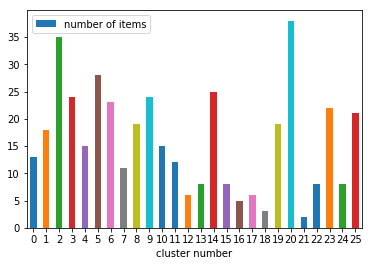

In [17]:
visualise_cluster_sizes_1(df)

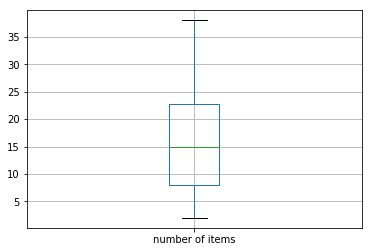

In [18]:
visualise_cluster_sizes_2(df)

Takze, vidime ze mame v niektorych clustroch prilis vela znakov, v inych velmi malo. To nieje co by sme chceli.

Skusim vyhodnotit moj cluster, o labelujem si svoj cluster. Budem merat ako dobre sa mi podarilo zaradit pismeno do clustra toho pismena.

In [19]:
y_test = list(map(lambda x: x[0] % 26, enumerate(immatrix)))
y_test

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [20]:
from sklearn.metrics import homogeneity_score, completeness_score

def score(truth, prediction):
    print('homogeneity_score:', homogeneity_score(truth, prediction))
    print('completeness_score:', completeness_score(truth, prediction))

Kedze mame uz teda clustre olablovane, mozeme pouzit supervised metriku.

Pouzijeme na to homogeneity_score a completeness_score.

"Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class."
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html

"A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster."

In [21]:
score(y_test, clusters)

homogeneity_score: 0.4886783147398281
completeness_score: 0.5173490487166529


Idealne skore je aby homogeneity_score bolo 1 a zaroven completeness_score bolo 1.

Skusim extrahovat z pixelov pocet bielych ploch. Takto mozem napriklad rozlisi pismeno c od d.

In [22]:
import collections

def get_images_white_board_counts(_images):
    WHITE = 250

    images_white_board_counts = [0] * len(_images)
    _immatrix = np.array([np.array(Image.open(im)) for im in _images], 'f')

    for index, image in enumerate(_immatrix):
        counter = 0
        for y, _ in enumerate(image):
            for x, _ in enumerate(image[y]):

                pixel = image[y][x]
                avg = sum(pixel) / len(pixel)

                if avg >= WHITE:
                    counter += 1

                    queue = collections.deque([x, y])
                    k = 0
                    while queue: 
                        k += 1
                        _x = queue.popleft()
                        _y = queue.popleft()

                        if (sum(image[_y][_x]) / len(image[_y][_x])) < WHITE:
                            continue

                        image[_y][_x] = [0, 0, 0, 0] # set as visited

                        for move in [[-1, 0], [1, 0], [0, 1], [0, -1]]:
                            next_x = _x + move[0]
                            next_y = _y + move[1]

                            if next_y >= 0 and next_x >= 0 and next_y < len(image) and next_x < len(image[_y]):
                                color = (sum(image[next_y][next_x]) / len(image[next_y][next_x]))
                                if color >= WHITE:
                                    queue.append(next_x)
                                    queue.append(next_y)

        images_white_board_counts[index] = counter
    return images_white_board_counts


images_white_board_counts = get_images_white_board_counts(images)

In [23]:
# images_white_board_counts

In [24]:
def add_white_board_counts_fn(a):
    index, img = a
    img = np.append(img, [images_white_board_counts[index]])
    return img

In [25]:
def add_white_board_counts(immatrix):
    return list(map(add_white_board_counts_fn, enumerate(immatrix)))

Pridam informaciu o pocte bielych ploch k datam ktore budem vyhodnocovat.

In [26]:
immatrix = add_white_board_counts(immatrix)

Znovu polozim KMeans.

In [27]:
cls = KMeans(n_clusters=26, random_state=420)
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.4886783147398281
completeness_score: 0.5173490487166529


Trosku som si vylepsil score.

In [28]:
df = get_cluster_sizes(clusters)

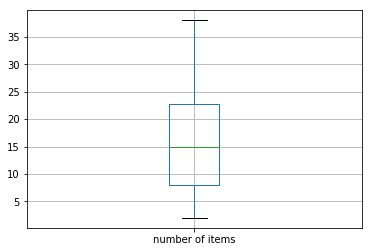

In [29]:
visualise_cluster_sizes_2(df)

Skusim zredukovat dimenzionalitu pre kazdy obrazok, mame tam momentalne strasne vela features.
To je image_size_x * image_size_y * rgba.
Co je 64 * 64 * 4. (Vsetky obrazky mame rovnake)

Urobim priemernu farbu pre kazde 2 pixely. Yolo.

In [30]:
def reduce_dim(img, mul = 2):
    step = 4 * mul
    
    result_img = []
    
    for x in range(0, len(img), step): # RGBA * n of pixels
        pixel = 0
        
        for y in range(x, x + step):
            pixel += img[y]
        
        result_img.append(int(pixel / step))
        
    return result_img

immatrix = np.array([reduce_dim(np.array(Image.open(im)).flatten()) for im in images], 'f')

Pre kazdy obrazok pridam aj informaciu o pocte bielych ploch.

In [31]:
immatrix = add_white_board_counts(immatrix)

In [32]:
cls = KMeans(n_clusters=26, random_state=420)
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.49411559955810497
completeness_score: 0.538347285488584


Zlepsil som aj homogeneity_score a aj completeness_score.

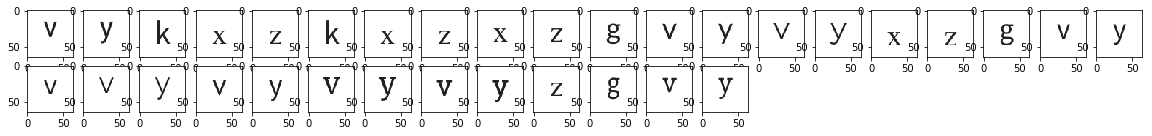

In [33]:
print_cluster(1)

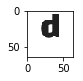

In [34]:
print_cluster(2)

LOL, tuto su spolu v clustri dokonca znaky s roznym poctom bielych miest.

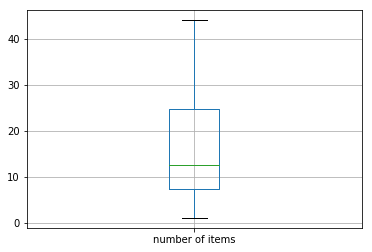

In [35]:
df = get_cluster_sizes(clusters)
visualise_cluster_sizes_2(df)

Stale su tie pocty v clustroch velmi variabilne.

Skusim este ine sposoby clustrovania.

In [36]:
from sklearn.cluster import DBSCAN

immatrix = np.array([np.array(Image.open(im)).flatten() for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

clustering = DBSCAN(eps=0.25, min_samples=2).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.16750140660493765
completeness_score: 0.5484062777993638


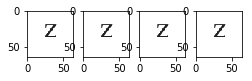

In [37]:
print_cluster(1)

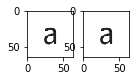

In [38]:
print_cluster(2)

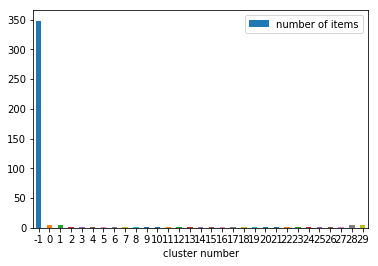

In [39]:
df = get_cluster_sizes(clusters)

visualise_cluster_sizes_1(df)

LOL 350 outlayerov.

Vyzera to tak ze to clastruje precizne, az prilis. Redukcia dimenzionality mozno pomoze. Rovno znormalizujem vsetky farby.

In [40]:
def normalize_colors_in_image(immatrix):
    return list(map(lambda x: 1 if x <= 128 else 0, immatrix))

In [41]:
immatrix = np.array([normalize_colors_in_image(reduce_dim(np.array(Image.open(im)).flatten(), 4)) for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

In [42]:
clustering = DBSCAN(eps=.58, min_samples=2).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.24379434785883272
completeness_score: 0.5436461737875931


Trochu som sa pohral s parametrami. Maximum som dosiahol 0.37 homogenity score, avsak! mal som velmi vela clustrov.

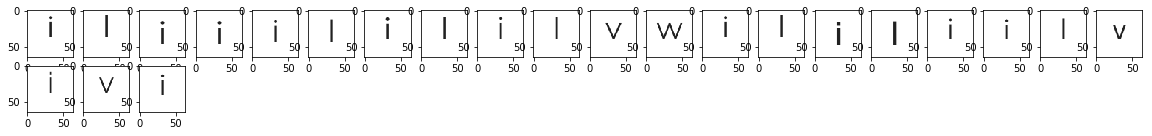

In [43]:
print_cluster(0)

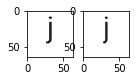

In [44]:
print_cluster(1)

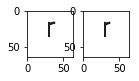

In [45]:
print_cluster(2)

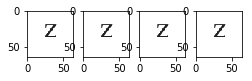

In [46]:
print_cluster(5)

Celkom ok.

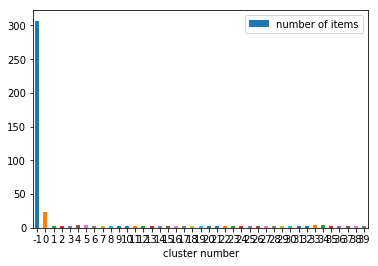

In [47]:
df = get_cluster_sizes(clusters)

visualise_cluster_sizes_1(df)

Skusim este meanshift.

In [48]:
immatrix = np.array([normalize_colors_in_image(reduce_dim(np.array(Image.open(im)).flatten(), 4)) for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

In [49]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=2).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.917708836455697
completeness_score: 0.5581795604634678


WHAAAAAAAT, YOLOOOO, Dufam ze tam nebude privela clustrov :)

In [50]:
df = get_cluster_sizes(clusters)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 1 columns):
number of items    303 non-null int64
dtypes: int64(1)
memory usage: 4.7 KB


In [51]:
df.head()

,number of items
cluster number,
0,45
1,5
2,6
3,4
4,4


No je ich celkom vela, 300 :(

Pohram sa s atributmi...

In [52]:
immatrix = np.array([normalize_colors_in_image(reduce_dim(np.array(Image.open(im)).flatten(), 4)) for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

In [53]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=5.0).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.10609232596483929
completeness_score: 0.4657422942318254


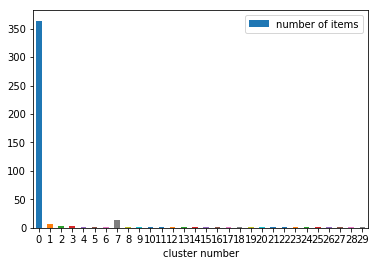

In [54]:
df = get_cluster_sizes(clusters)

visualise_cluster_sizes_1(df)

Neuspesne, iba som to pokazil.

To je asi zatial vsetko.

TODO: Skusit pocet ciernych ploch. Skusit detekciu poctu hran, poctu rohov, poctu oblukov? (scikit-image) Fix, redukcia dimenzionality! Skusit inu metriku v clusteringu.

# 5. Odovzanie

#### Co sa stalo naposledy?

#### "Podarilo", skor nepodarilo sa mi rozclustrovat pismena podla fontu do, ktoreho patria.

#### Urobil som chybu s resizovanim obrazku, resizoval som iba os x, to skusim napravit.

#### Nepridal som vacsiu dolezitost poctu bielych ploch obrazka pri clustrovani to tiez opravim.

### Urobim si pomocne funkcie z kodov uvedenych vyssie a pridan aj detekciu poctu ciernych ploch - pomoze mi odlisit i a j

In [55]:
import collections

def get_black_board_counts(_images):
    BLACK = 15

    images_black_board_counts = [0] * len(_images)
    _immatrix = np.array([np.array(Image.open(im)) for im in _images], 'f')

    for index, image in enumerate(_immatrix):
        counter = 0
        for y, _ in enumerate(image):
            for x, _ in enumerate(image[y]):

                pixel = image[y][x]
                avg = sum(pixel) / len(pixel)

                if avg <= BLACK:
                    counter += 1

                    queue = collections.deque([x, y])
                    k = 0
                    while queue: 
                        k += 1
                        _x = queue.popleft()
                        _y = queue.popleft()

                        if (sum(image[_y][_x]) / len(image[_y][_x])) > BLACK:
                            continue

                        image[_y][_x] = [255, 255, 255, 255] # set as visited

                        for move in [[-1, 0], [1, 0], [0, 1], [0, -1]]:
                            next_x = _x + move[0]
                            next_y = _y + move[1]

                            if next_y >= 0 and next_x >= 0 and next_y < len(image) and next_x < len(image[_y]):
                                color = (sum(image[next_y][next_x]) / len(image[next_y][next_x]))
                                if color <= BLACK:
                                    queue.append(next_x)
                                    queue.append(next_y)

        images_black_board_counts[index] = counter
    return images_black_board_counts


images_black_board_counts = get_black_board_counts(images)

Pocet ciernych ploch dam * 1000000, pocet bielych dam * 1000.

In [56]:
def add_board_counts_fn(a):
    index, img = a
    img = np.append(img, [images_white_board_counts[index] * 1000])
    img = np.append(img, [images_black_board_counts[index] * 1000000])
    return img

In [57]:
def rgba_to_int(img):
    result_img = np.empty((len(img), len(img[0])))
    
    def to_int(rgb):
        red = rgb[0]
        green = rgb[1]
        blue = rgb[2]
        RGBint = (red << 16) + (green << 8) + blue
        return RGBint
    
    for y in range(0, len(img)):
        for x in range(0, len(img[y])):
            rgba = img[y][x]
            result_img[y][x] = to_int(rgba)
        
    return result_img

In [58]:
def normalize_colors_in_image(immatrix):
    return list(map(lambda x: 1 if x <= 8388607 else 0, immatrix))

In [59]:
def add_board_counts(immatrix):
    return list(map(add_board_counts_fn, enumerate(immatrix)))

In [60]:
def _visualise_cluster_sizes_1(clusters):
    df = get_cluster_sizes(clusters)

    visualise_cluster_sizes_1(df)

In [61]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

def resize_image(image, div = 2):
    return resize(image, (round(image.shape[0] / div), round(image.shape[1] / div)), anti_aliasing = True, mode='constant')

In [62]:
def show_image(image):
    fig, ax = plt.subplots()
    
    ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
    ax.axis((0, len(image), len(image[0]), 0))

### Skusim zmovu KMeans.

In [63]:
immatrix = np.array([normalize_colors_in_image(np.array(rgba_to_int(np.array(Image.open(im)))).flatten()) for im in images], 'f')
immatrix = add_board_counts(immatrix)

cls = KMeans(n_clusters=26, random_state=420)
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.556813928824347
completeness_score: 0.5808456687316006


### Mam lepsiu homogenity_score aj completness_score.

### Predtym som mal s KMEANS.
__homogeneity_score: 0.49411559955810497__

__completeness_score: 0.538347285488584__

#### Skusal som rozne dostupne algoritmy, ktore scikit poskytuje.
#### Poskytuje “auto”, “full” a “elkan”.
#### ”auto” (default value) performuje najlepsie. 

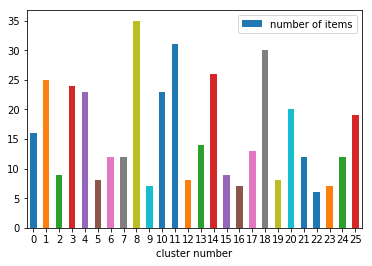

In [64]:
_visualise_cluster_sizes_1(clusters)

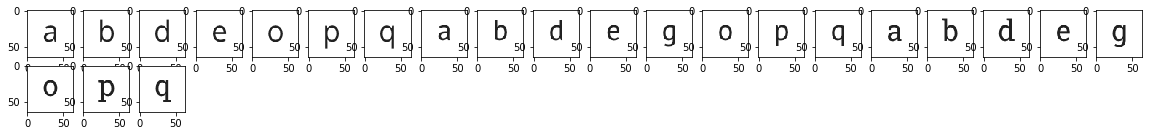

In [65]:
print_cluster(4)

Skusim zmensit image 2x.

In [66]:
immatrix = np.array([normalize_colors_in_image(np.array(resize_image(rgba_to_int(np.array(Image.open(im))), 2)).flatten()) for im in images], 'f')
immatrix = add_board_counts(immatrix)

cls = KMeans(n_clusters=26, random_state=420)
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.5217618015315242
completeness_score: 0.554778344492402


Trochu mam horsie vysledky.

Skusim zmensit image 4x.

In [67]:
immatrix = np.array([normalize_colors_in_image(np.array(resize_image(rgba_to_int(np.array(Image.open(im))), 4)).flatten()) for im in images], 'f')
immatrix = add_board_counts(immatrix)

cls = KMeans(n_clusters=26, random_state=420, algorithm='elkan')
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.4714181826299592
completeness_score: 0.540255182073868


Skusim zmensit image 6x.

In [68]:
immatrix = np.array([normalize_colors_in_image(np.array(resize_image(rgba_to_int(np.array(Image.open(im))), 6)).flatten()) for im in images], 'f')
immatrix = add_board_counts(immatrix)

cls = KMeans(n_clusters=26, random_state=420, algorithm='elkan')
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.3722086347810647
completeness_score: 0.5521695180794786


Zmensovanim obrazkov dostavam horsie vysledky.

### Skusim Mean Shift.

In [69]:
immatrix = np.array([normalize_colors_in_image(np.array(rgba_to_int(np.array(Image.open(im)))).flatten()) for im in images], 'f')
immatrix = add_board_counts(immatrix)

clustering = MeanShift(bandwidth=2.0).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.9999999999999994
completeness_score: 0.5537159139983053


Vidim ze mam velku homogenitu co znamena ze budem mat pri nizsej completeness velmi vela clustrov...

In [70]:
len(get_cluster_sizes(clusters))

376

### Skusim dalej ziskat informaciu o pocte rohov, alebo ich poziciach.

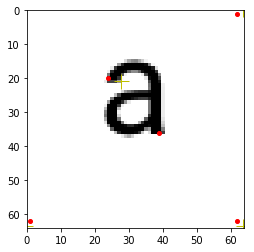

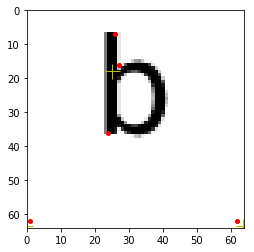

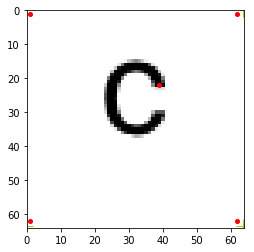

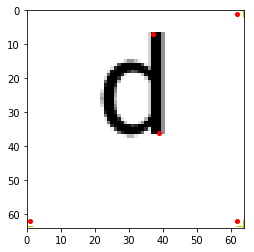

In [71]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, corner_shi_tomasi

immatrix = np.array([rgba_to_int(np.array(Image.open(im))) for im in images], 'f')

for x in range(4):
    image = immatrix[x]
    
    coords = corner_peaks(corner_harris(image, k = 0.0001), num_peaks=5, exclude_border=False)

    coords_subpix = corner_subpix(image, coords, window_size=13)

    fig, ax = plt.subplots()
    ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=8)
    ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+y', markersize=15)
    ax.axis((0, len(image), len(image[0]), 0))

### Podla obrazkov vidime ze nam detegovalo aj rohy samotneho obrazka, toho sa skusim zbavit inverznutim farieb.

In [72]:
def img_inverse_colors(img):
    result_img = np.empty((len(img), len(img[0])))
    
    for y in range(0, len(img)):
        for x in range(0, len(img[y])):
            result_img[y][x] = 16581375 - img[y][x]
        
    return result_img

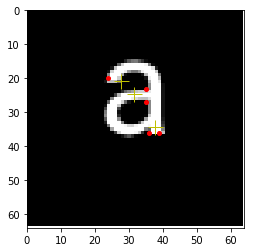

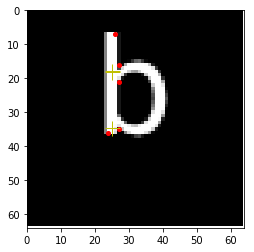

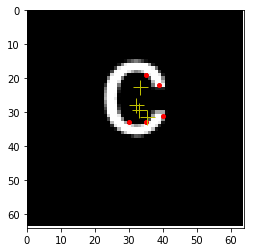

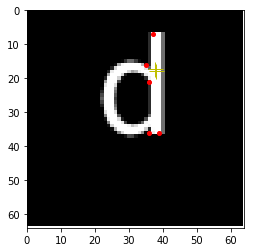

In [73]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, corner_shi_tomasi

immatrix = np.array([img_inverse_colors(rgba_to_int(np.array(Image.open(im)))) for im in images], 'f')

for x in range(4):
    image = immatrix[x]
    
    coords = corner_peaks(corner_harris(image, k = 0.0001), num_peaks=5, exclude_border=False)

    coords_subpix = corner_subpix(image, coords, window_size=13)

    fig, ax = plt.subplots()
    ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=8)
    ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+y', markersize=15)
    ax.axis((0, len(image), len(image[0]), 0))

### Okej, uz je to lepsie. Skusim sa teraz pozriet na celu abecedu.

In [74]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, corner_shi_tomasi

def get_image_corner_peaks(image, k = 0.000001):
    return corner_peaks(corner_harris(image, k), exclude_border=False)


def show_image_corner_peaks(image):
    coords = get_image_corner_peaks(image)
    
    coords_subpix = corner_subpix(image, coords, window_size=13)

    fig, ax = plt.subplots()
    ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=8)
    ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+y', markersize=15)
    ax.axis((0, len(image), len(image[0]), 0))

Nacitame obrazky.

In [75]:
immatrix = np.array([img_inverse_colors(rgba_to_int(np.array(Image.open(im)))) for im in images], 'f')

Zobrazime si cornery jednej abecedy.

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


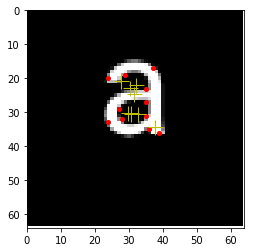

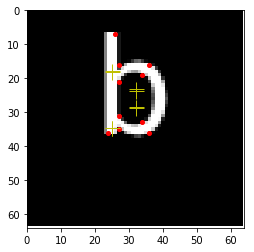

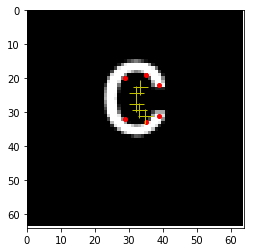

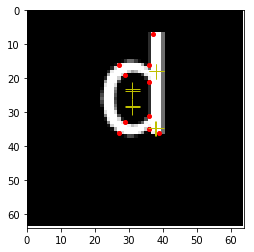

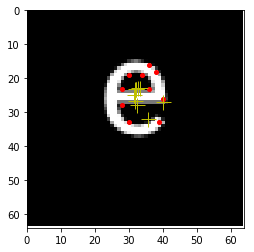

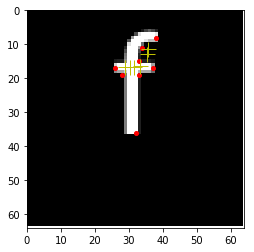

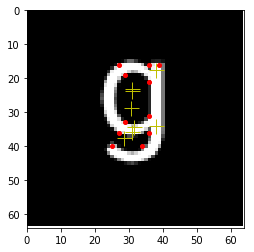

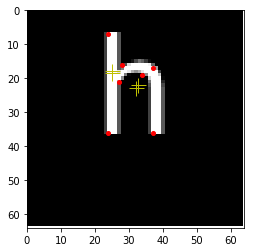

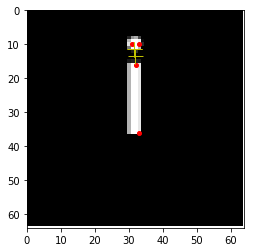

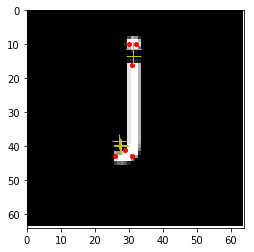

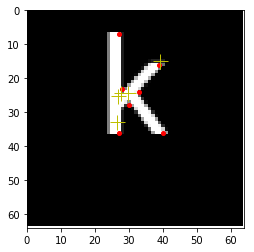

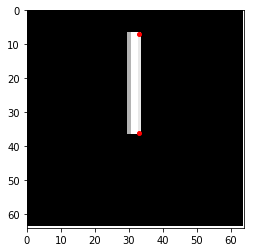

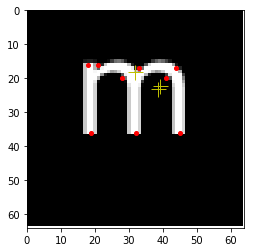

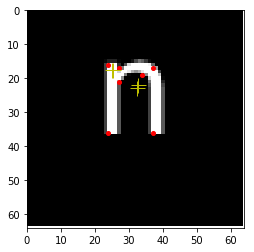

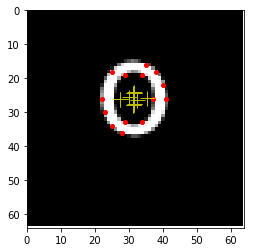

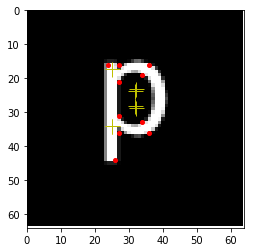

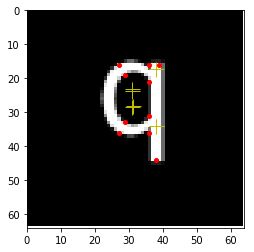

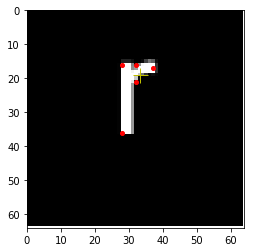

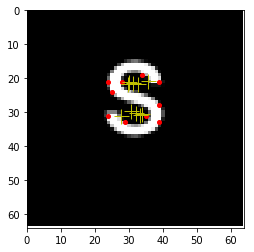

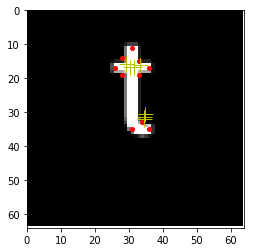

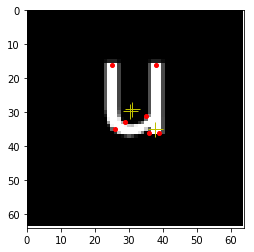

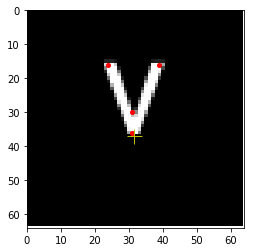

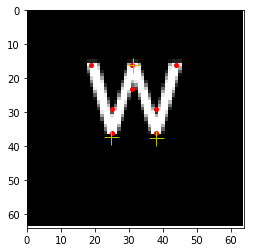

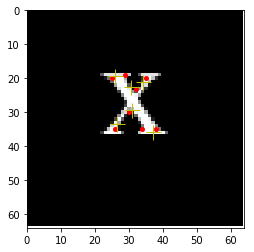

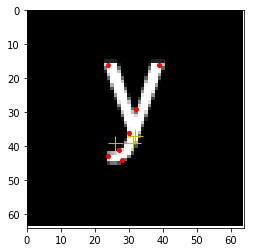

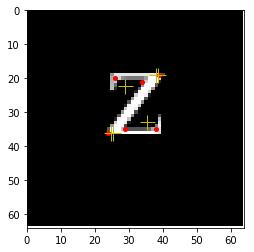

In [76]:
for x in range(26):
    show_image_corner_peaks(immatrix[x])

### Taktiez si skusime zobrazit cornery pre jedno pismeno.

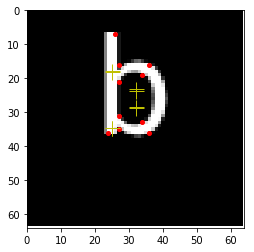

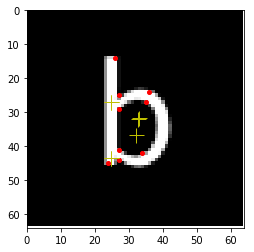

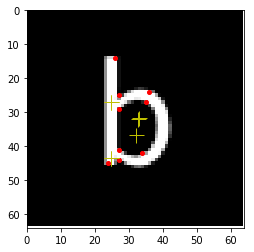

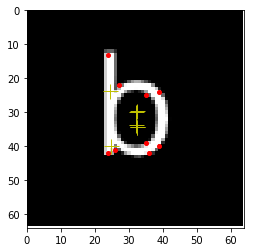

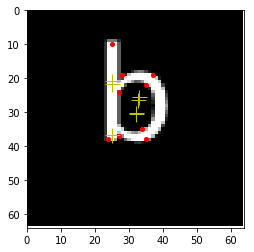

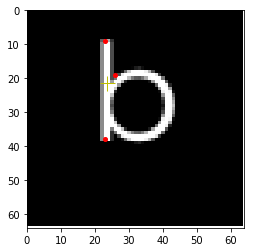

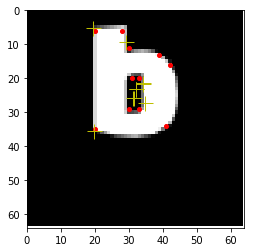

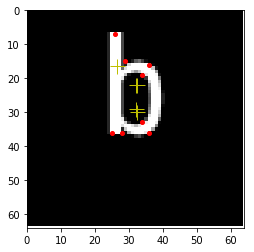

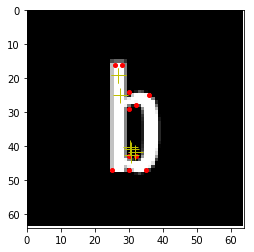

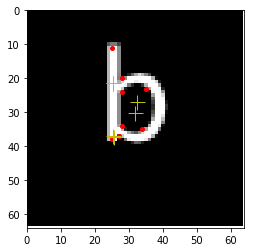

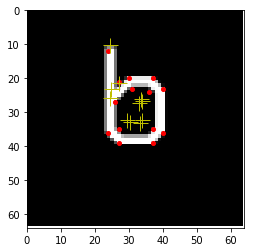

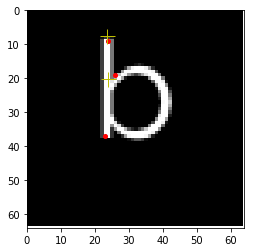

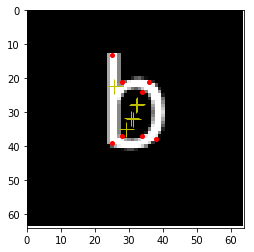

In [77]:
for x in range(1, 13 * 26, 26):
    show_image_corner_peaks(immatrix[x])

No vyzera to tak ze to deteguje celkom dobre pri roznych fontoch.

#### Skusim analyzovat pocty cornerov roznych fontov pre jednotlive pismena.

In [78]:
immatrix = np.array([img_inverse_colors(rgba_to_int(np.array(Image.open(im)))) for im in images], 'f')

In [79]:
letters = []
corners = []

for index, img in enumerate(immatrix):
    letters.append(chr(ord('a') + (index % 26)))
    corners.append(len(get_image_corner_peaks(img)))

                            
df = pd.DataFrame({ 'letter': letters, 'corner count': corners }, columns=['letter', 'corner count'])
df.head()

,letter,corner count
0,a,11
1,b,10
2,c,6
3,d,10
4,e,10


### Vysledky si vizualizujem.

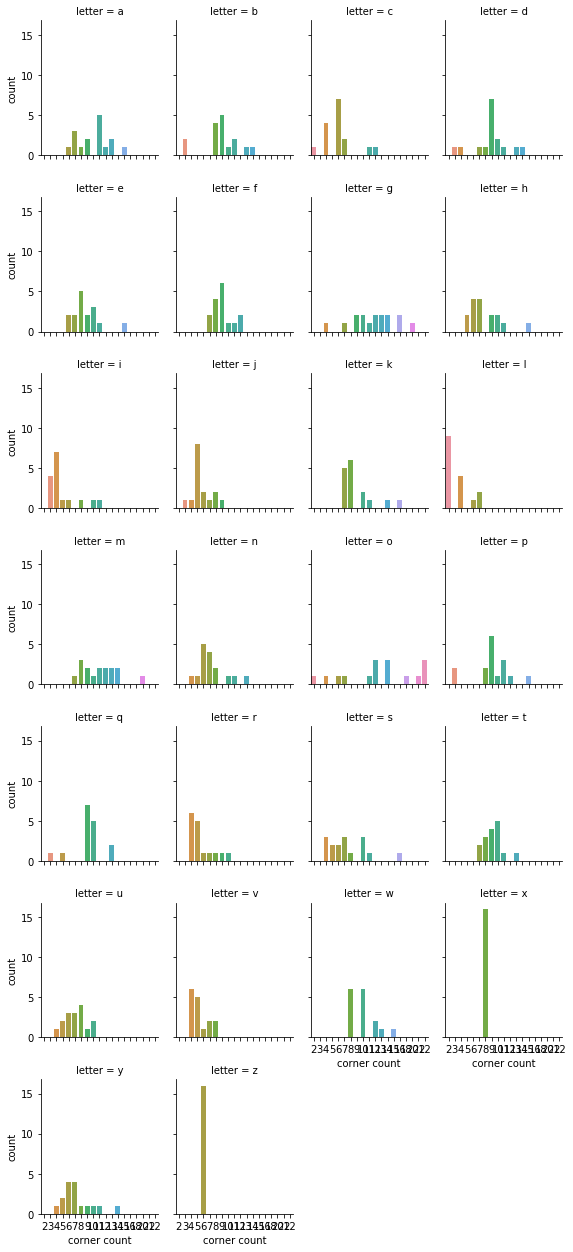

In [80]:
sb.catplot("corner count", col="letter", col_wrap=4, data=df, kind="count", height=2.5, aspect=.8)

__Vysledok je celkom... smutny alebo zaujimavy???.__

__Rovnaky pocet cornerov jedneho pismena pri roznych fotoch ma pismeno z a x. U ostatnych fontoch je toto cislo dost rozne.__

__Na detekciu hran existuje viacero algoritmov, ja som konkretne pouzil Harrisov algoritmus.__

__V scikite je k dispozicii viacero algoritmov, vyskusal som vsetky s roznymi parametrami.__

__Myslim si, ze daju sa dosiahnut aj lepsie vysledky ale to by som musel tymto algoritmom aj rozmumiet, aby som vybral ten spravny a vedel ho aj spravne nastavit.
Kebyze mam viac casu, mozno by som sa na to dal. Zatial to necham takto ako to je.__

TODO: Skusit na zistenych suradniciach zmenit hodnotu pixelov.

## Skusim spravit este detekciu hran.

In [81]:
immatrix = np.array([img_inverse_colors(rgba_to_int(np.array(Image.open(im)))) for im in images], 'f')

#### Skusim dva dostupne algoritmy zo scikit learn.

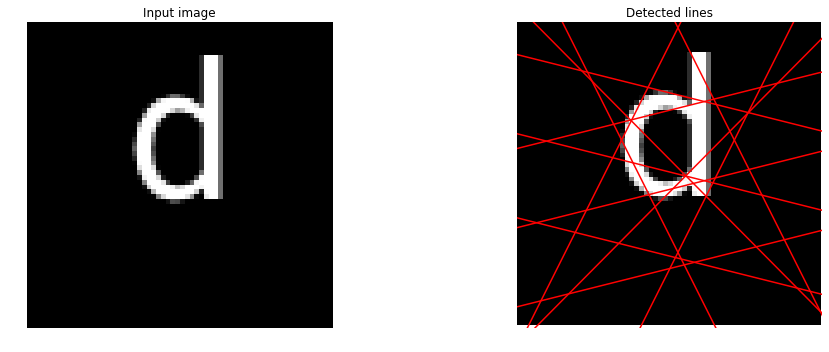

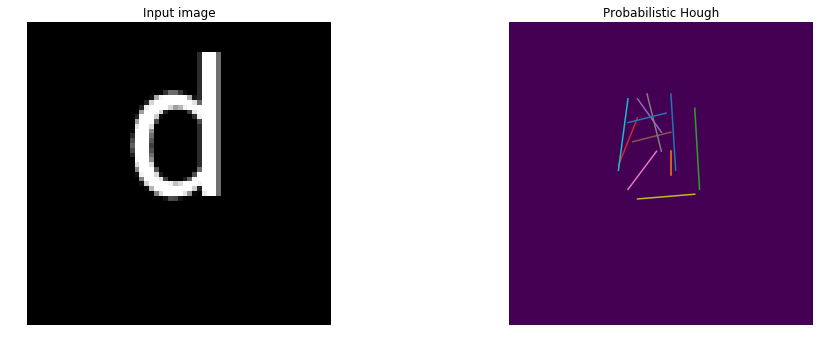

In [89]:
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from skimage.feature import canny
from matplotlib import cm


def hough_line_show(lines):
    # Classic straight-line Hough transform
    h, theta, d = lines

    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(image, cmap=cm.gray)

    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[1].plot((0, image.shape[1]), (y0, y1), '-r')

    ax[1].set_xlim((0, image.shape[1]))
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_axis_off()
    ax[1].set_title('Detected lines')

    plt.tight_layout()
    plt.show()
    
def probabilistic_hough_line_show(lines):
    # Generating figure 2
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')


    ax[1].imshow(image * 0)

    for line in lines:
        p0, p1 = line
        ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))

    ax[1].set_xlim((0, image.shape[1]))
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_title('Probabilistic Hough')

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()
    

hough_line_show(hough_line(immatrix[0]))
probabilistic_hough_line_show(probabilistic_hough_line(canny(immatrix[0], 2, 1, 25), threshold=10, line_length=5, line_gap=3))

Prvy pokus dopadol zaujimavo, zatial vyzera ze s probabilistic_hough_line algoritmom sa bude pracovat lepsie, skusim vytunit ten.

Zrusim line_gap uplne. Nastavim parametre tak aby to vyzeralo co najlepsie.

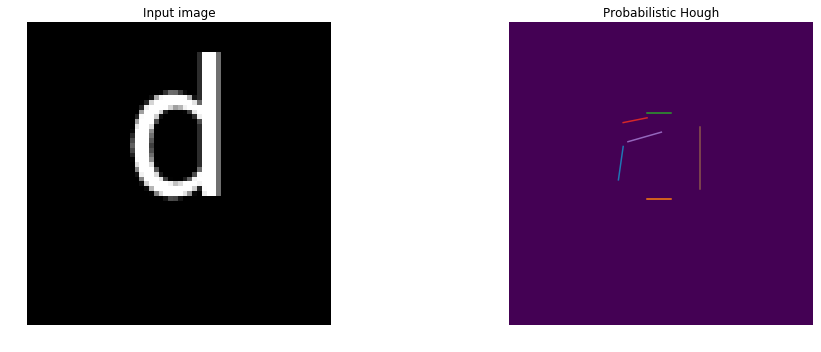

In [90]:
probabilistic_hough_line_show(probabilistic_hough_line(canny(immatrix[0], 2, 1, 25), threshold=8, line_length=5, line_gap=0))

Tuto konfiguraciu si vyskusam na vsetkych pismenach a vypisem si pocet zistenych ciar.

In [91]:
def try_something_pls(fn):
    letters = []
    corners = []

    for index, img in enumerate(immatrix):
        letters.append(chr(ord('a') + (index % 26)))
        corners.append(len(fn(img)))


    df = pd.DataFrame({ 'letter': letters, 'line count': corners }, columns=['letter', 'line count'])
    df.head()

    sb.catplot("line count", col="letter", col_wrap=4, data=df, kind="count", height=2.5, aspect=.8)

Urobil som si takuto funkciu, do nej budem davat lambdu a nastavovat parametre detekcie ciar a budem sledovat graf, skusim vybrat co najlepsi config.

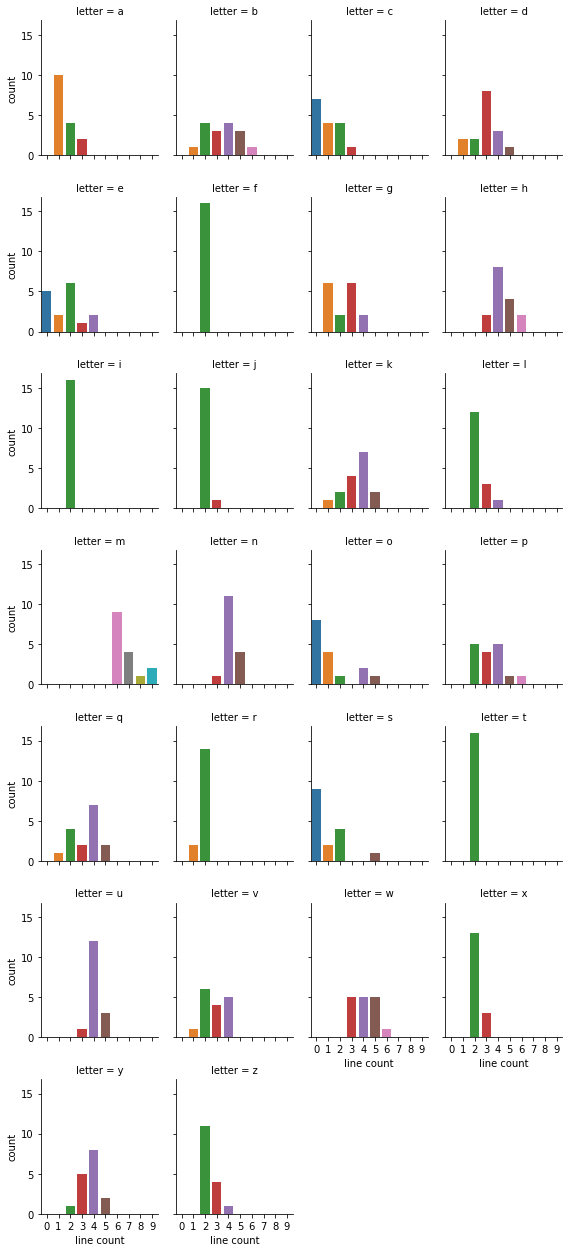

In [92]:
try_something_pls(lambda img: probabilistic_hough_line(canny(img, 2, 1, 25), threshold=12, line_length=8, line_gap=0))

Toto vyzera byt okej.

In [97]:
def add_line_counts(immatrix):
    def fn(item):
        index, zipped = item
        img, img2d = zipped
        
        lines = probabilistic_hough_line(canny(img2d, 2, 1, 25), threshold=12, line_length=8, line_gap=0)
        img = np.append(img, [len(lines)])
        return img

    return list(map(fn, enumerate(immatrix)))

def add_corner_counts(immatrix):
    def fn(item):
        index, zipped = item
        img, img2d = zipped
        
        lines = get_image_corner_peaks(img2d)
        img = np.append(img, [len(lines)])
        return img

    return list(map(fn, enumerate(immatrix)))

### Skusim pridat informacie o pocte lineov a pocte conerov.

In [98]:
immatrix = np.array([normalize_colors_in_image(np.array(rgba_to_int(np.array(Image.open(im)))).flatten()) for im in images], 'f')
immatrix_2d = np.array([img_inverse_colors(rgba_to_int(np.array(Image.open(im)))) for im in images], 'f')

immatrix = add_board_counts(immatrix)
immatrix = add_line_counts(zip(immatrix, immatrix_2d))
immatrix = add_corner_counts(zip(immatrix, immatrix_2d))

cls = KMeans(n_clusters=26, random_state=420)
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.5655299196692766
completeness_score: 0.6022353527250297


### Mam lepsiu homogenity_score aj completness_score.
### Predtym som mal s KMEANS.

### homogeneity_score: 0.556813928824347
### completeness_score: 0.5808456687316006

### Rozdiel je vacsi len o trocha ale stale potesi

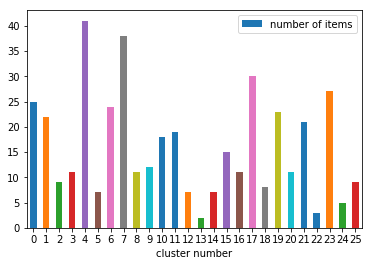

In [99]:
_visualise_cluster_sizes_1(clusters)

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


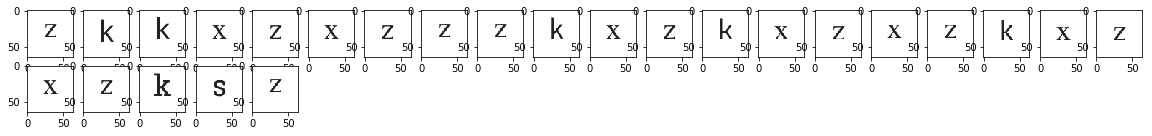

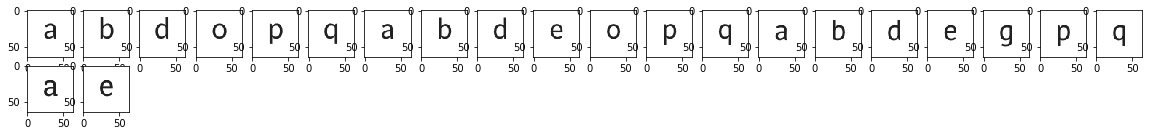

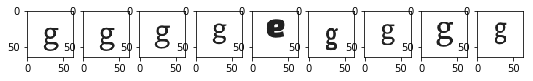

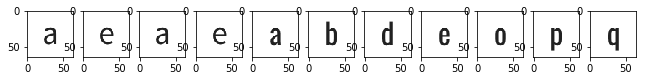

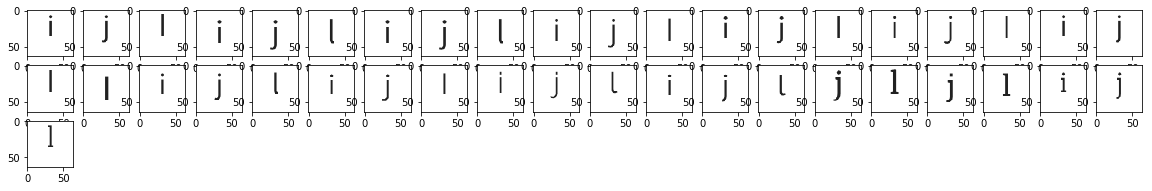

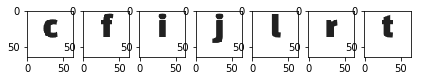

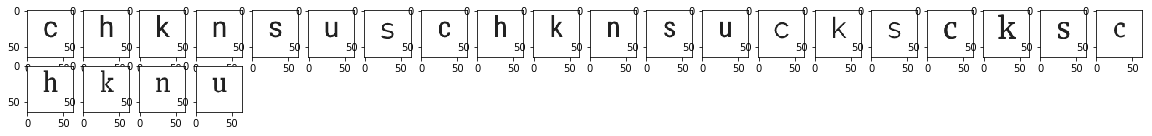

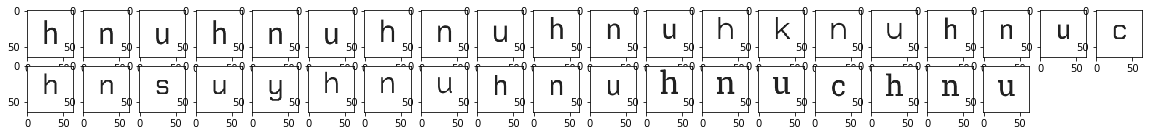

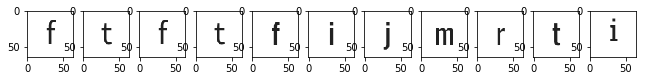

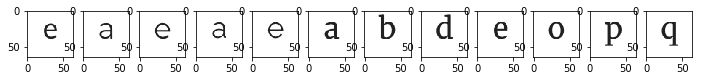

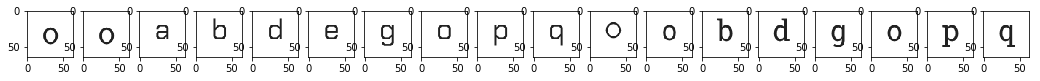

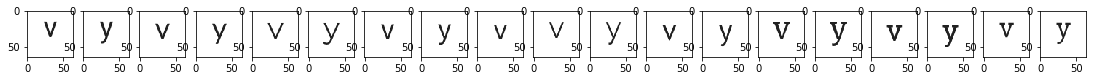

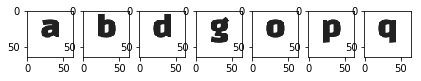

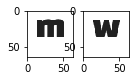

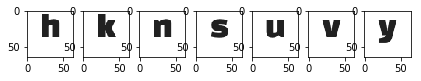

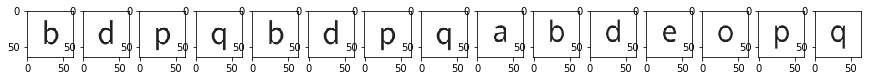

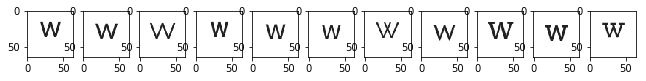

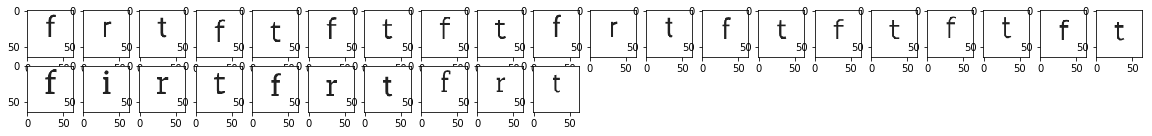

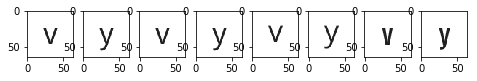

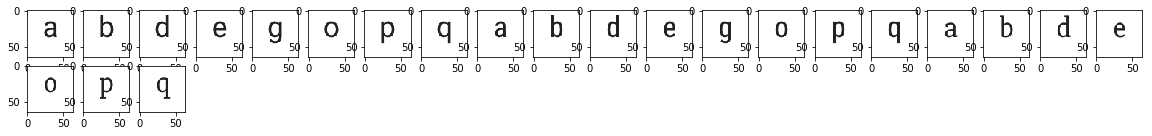

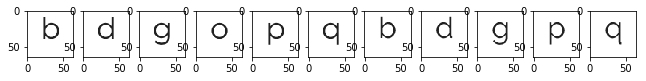

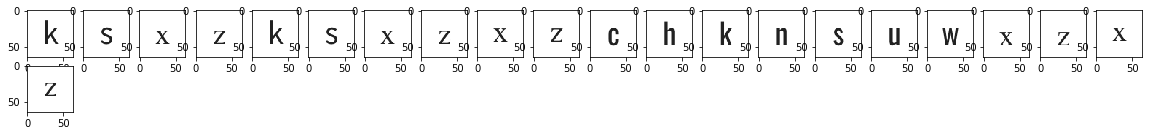

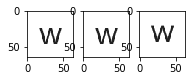

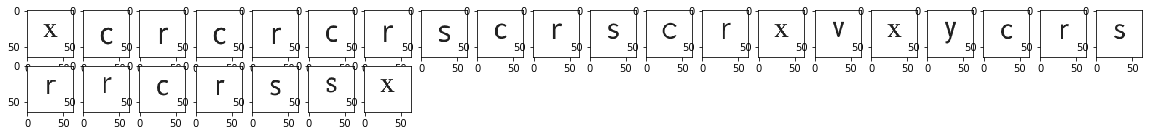

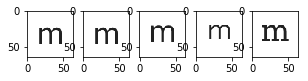

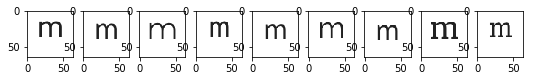

In [101]:
for i in range(26):
    print_cluster(i)

### Neviem ci ma este zmysel skusat ine algoritmy, kedze mi vacsinou performovali horsie. V tomto momente by som uz asi skoncil.

### Stale vidim priestr na zlepsenie, najma v image processingu